## Setup

In [ ]:
!pip install fastai2
from fastai2.basics import *

     |████████████████████████████████| 184kB 2.8MB/s 


## Data

In [ ]:
n=100

In [ ]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.6393,  1.0000],
        [-0.6531,  1.0000],
        [ 0.6688,  1.0000],
        [-0.8517,  1.0000],
        [ 0.8044,  1.0000]])

In [ ]:
a = tensor(3.,2); a

tensor([3., 2.])

In [ ]:
y = x@a + 0.25*torch.randn(n)

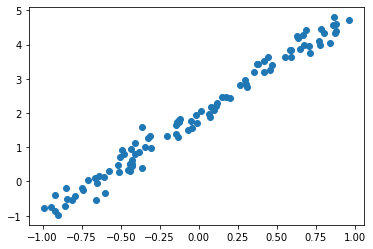

In [ ]:
plt.scatter(x[:,0], y);

## Parameters Initialization

In [ ]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [ ]:
a = tensor(-1.,1)

In [ ]:
y_hat = x@a
mse(y_hat, y)

tensor(5.6588)

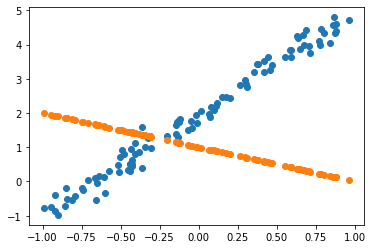

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

## Parameters Search

In [ ]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [ ]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [ ]:
lr = 1e-1
for t in range(1000): update()
a

tensor(5.6588, grad_fn=<MeanBackward0>)
tensor(1.4541, grad_fn=<MeanBackward0>)
tensor(0.4416, grad_fn=<MeanBackward0>)
tensor(0.1609, grad_fn=<MeanBackward0>)
tensor(0.0825, grad_fn=<MeanBackward0>)
tensor(0.0606, grad_fn=<MeanBackward0>)
tensor(0.0545, grad_fn=<MeanBackward0>)
tensor(0.0528, grad_fn=<MeanBackward0>)
tensor(0.0523, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)
tensor(0.0522, grad_fn=<MeanBackward0>)


Parameter containing:
tensor([2.9778, 1.9777], requires_grad=True)

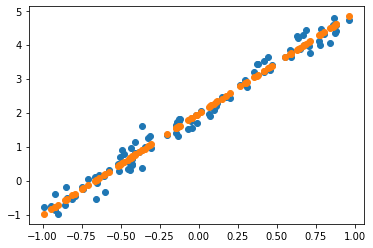

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

## Animation

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [ ]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='blue')
line, = plt.plot(x[:,0], x@a.detach(), c='orange')
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)